# FASHION MNIST : IMAGE CLASSIFICATION USING CONVOLUTIONAL NEURAL NETWORK(CNN)

In this work, I will train a Convolutional Neural Network classifier with VGG style 3 block of convolution layers using the Keras deep learning library

## LOADING LIBRARIES

In [27]:
# basic
import numpy as np 
import pandas as pd

# visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from keras.datasets import fashion_mnist
from tensorflow.keras import callbacks
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from keras.layers import Dense,MaxPool2D,Conv2D,BatchNormalization,Flatten,Dropout

## GETTING THE DATA

I imported the  data directly from the Keras datasets. Since keras already has the cleaned version of the  data.

### DATA DESCRIPTION
Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot



In [4]:
(train,train_label),(test,test_label) = fashion_mnist.load_data()

In [5]:
print('The shape of train',train.shape)

print('The shape of train_label',train_label.shape)

print('The shape of test',test.shape)

print('The shape of test_label',test_label.shape)

The shape of train (60000, 28, 28)
The shape of train_label (60000,)
The shape of test (10000, 28, 28)
The shape of test_label (10000,)


## DATA EXPLORATION

First, I'll  start by visualizing the variable of interest.

I'll  view the  images in a grid format.

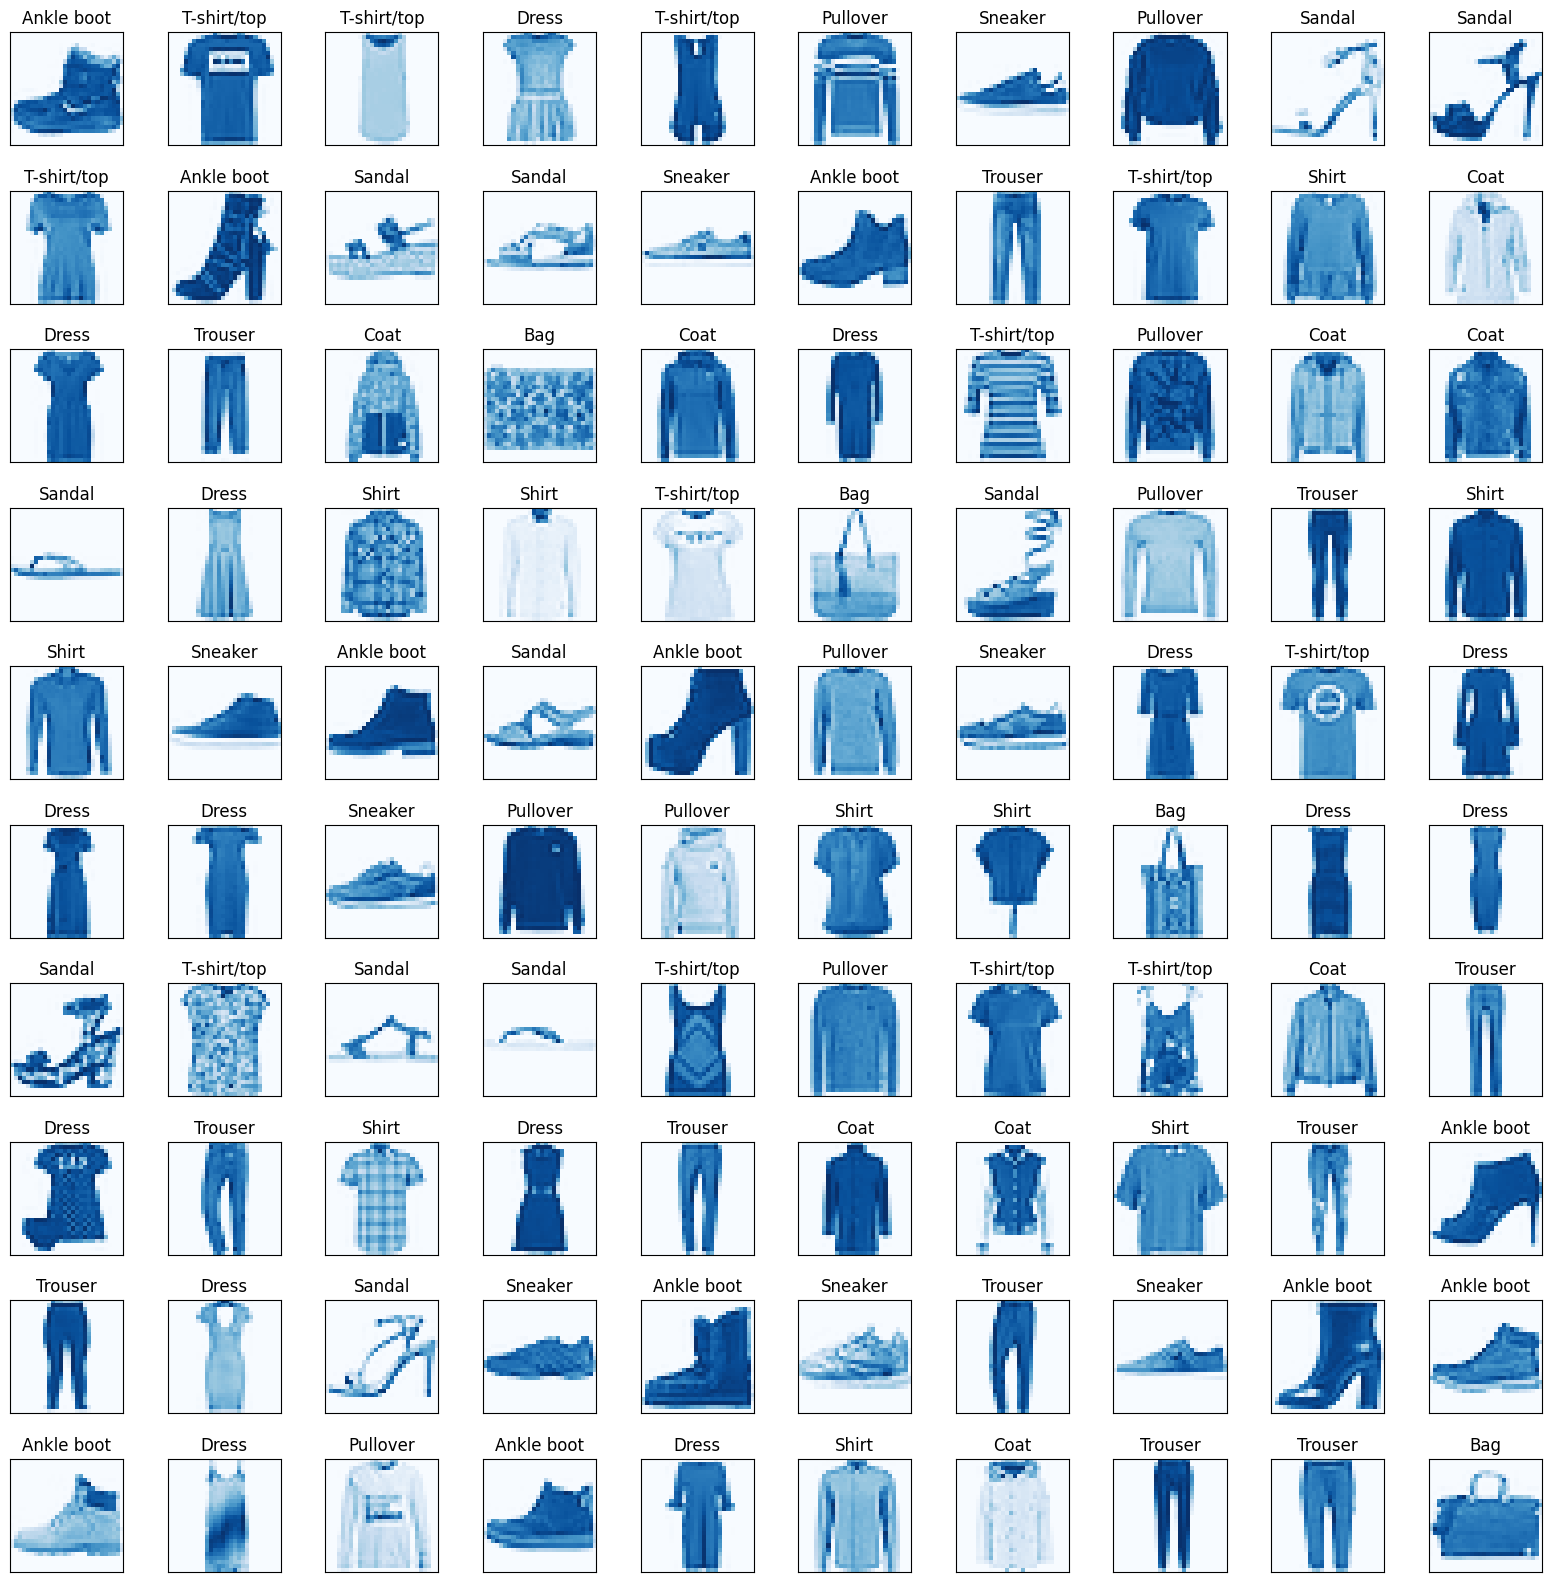

In [6]:
fig, axes = plt.subplots(10, 10, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.4)

labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for ax, image, label in zip(axes.flat, train[:100], train_label[:100]):
    ax.imshow(image, cmap='Blues')
    ax.set_title(labels[int(label)], fontsize=12)

plt.show()


Now I will Create a barplot to see the class distrubtion in trainting and testing set.

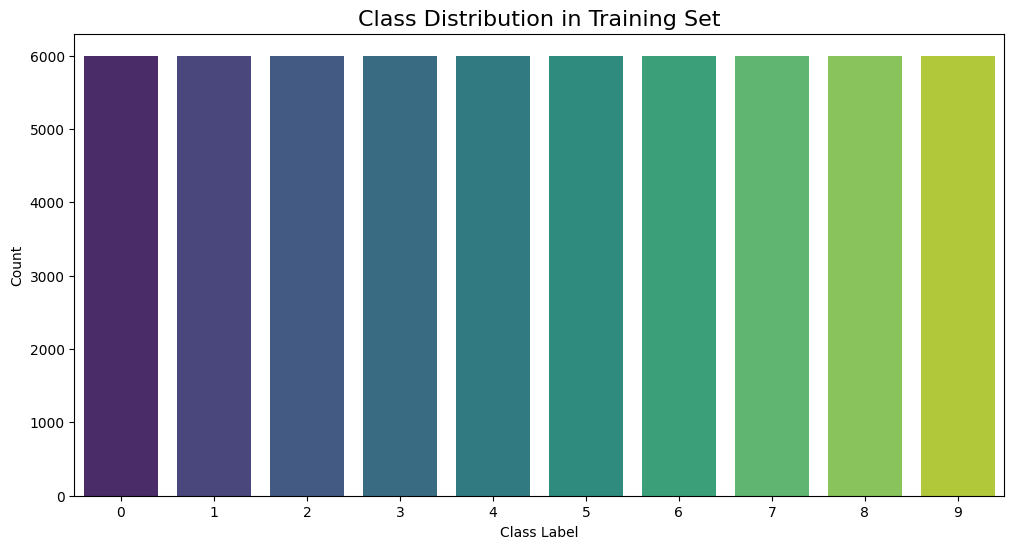

In [7]:
# Data Preparation
label, count = np.unique(train_label, return_counts=True)
class_distribution = pd.DataFrame({'Class': label, 'Count': count})

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=class_distribution, x='Class', y='Count', palette='viridis')
plt.title('Class Distribution in Training Set', fontsize=16)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

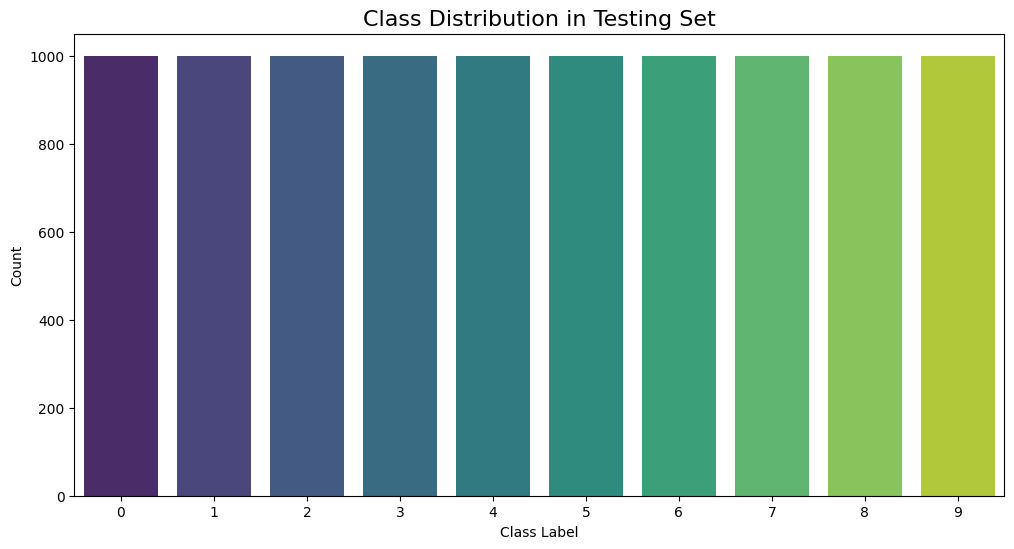

In [8]:
# Data Preparation
labels, counts = np.unique(test_label, return_counts=True)
class_distribution_test = pd.DataFrame({'Class': labels, 'Count': counts})

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=class_distribution_test, x='Class', y='Count', palette='viridis')
plt.title('Class Distribution in Testing Set', fontsize=16)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

## DATA PREPARATION

**Reshaping the Data**:

Original Shape: (60000, 28, 28)
Transformed Shape: (60000, 28 * 28)
The original shape represents 60,000 images, each of size 28x28 pixels. Reshaping it into (60000, 28 * 28) essentially flattens each image into a one-dimensional array of size 28 * 28 (784). This is often done because many neural networks, especially dense layers, expect a one-dimensional input.

**Scaling the Pixel Values**:

Original Value Range: [0, 255]
Transformed Value Range: [0, 1]
The original pixel values in the image data range from 0 to 255 (assuming pixel values are represented as uint8). Scaling these values to the [0, 1] interval is common in neural network training. It is often beneficial for optimization algorithms and helps in preventing issues related to exploding or vanishing gradients during training.
The reshaping and scaling ensure that the data is in a format suitable for feeding into the network while optimizing the training process.

In [9]:
# Function to normalize data
def pre_process(data):
    return data / 255.0

# Function to convert labels to categorical data
def to_cat(data):
    return to_categorical(data, num_classes=10)

# Preprocess the data
train_data, test_data = pre_process(train), pre_process(test)

# Convert labels to categorical data
train_label = to_cat(train_label)

# Print the shapes of the transformed data
print('Shape of preprocessed training data:', train_data.shape)
print('Shape of preprocessed testing data:', test_data.shape)
print('Shape of one-hot encoded training labels:', train_label.shape)


Shape of preprocessed training data: (60000, 28, 28)
Shape of preprocessed testing data: (10000, 28, 28)
Shape of one-hot encoded training labels: (60000, 10)


### TEST TRAIN SPLIT

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train, train_label, test_size=0.2, random_state=42)

# Display the number of samples in the training and testing sets
print(f'The number of training samples: {X_train.shape[0]}')
print(f'The number of testing samples: {X_test.shape[0]}')


The number of training samples: 48000
The number of testing samples: 12000


In [11]:
# reshaping data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')


### DEEP LEARNING MODEL

This cutting-edge Convolutional Neural Network (CNN) is designed to analyze special data blocks known as tensors, which are essentially like digital representations of images with specific dimensions – a certain height, a specific width, and a distinctive color channel. In this instance, I tailor the CNN to adeptly handle data blocks that are precisely sized at 28 units in height, 28 units in width, and contain just one color channel. This bespoke configuration aligns seamlessly with the unique format of the captivating FashionMNIST images. I achieve this by explicitly instructing the CNN, particularly its inaugural layer, to expect input data shaped precisely as (28, 28, 1). This meticulous setup ensures that the CNN is perfectly attuned to process and unravel the intricate patterns within these fascinating FashionMNIST images.

In [12]:
# Create a sequential model
model = models.Sequential()

# Block 1
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))

# Block 2
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.3))

# Block 3
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

# Output Layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


2023-11-24 13:22:30.122087: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


**Block 1**:
Consists of two convolutional layers with 32 filters each, using a kernel size of 3x3.
Batch normalization is applied after each convolutional layer.
Max pooling reduces the spatial dimensions of the feature map.
Dropout is used to randomly deactivate a fraction (20%) of neurons, reducing overfitting.

**Block 2:**
Similar to Block 1 but with larger filters (64 filters in each convolutional layer).
The dropout rate is slightly increased to 30% for regularization.

**Block 3:**
Again, similar to previous blocks but with even larger filters (128 filters in each convolutional layer).
Dropout rate is further increased to 40%.

**Output Layers:**
Flattens the output to a one-dimensional array.
Dense layers with batch normalization and dropout for further feature extraction and regularization.
The final layer has 10 units (for 10 classes) and uses the softmax activation function for multi-class classification.

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

In [14]:
# Model Compilation
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Early Stopping Callback
early_stopping = callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True
)


In [15]:
# BASE MODEL
# Model Training
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    callbacks=[early_stopping],  
    verbose=0
)

# Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test, batch_size=64, verbose=0)


In [16]:
# Print Model Evaluation Results
print('The accuracy of the Base Model is:', accuracy * 100)
print('The Loss of the Base Model is:', loss)

The accuracy of the Base Model is: 92.2166645526886
The Loss of the Base Model is: 0.22431504726409912


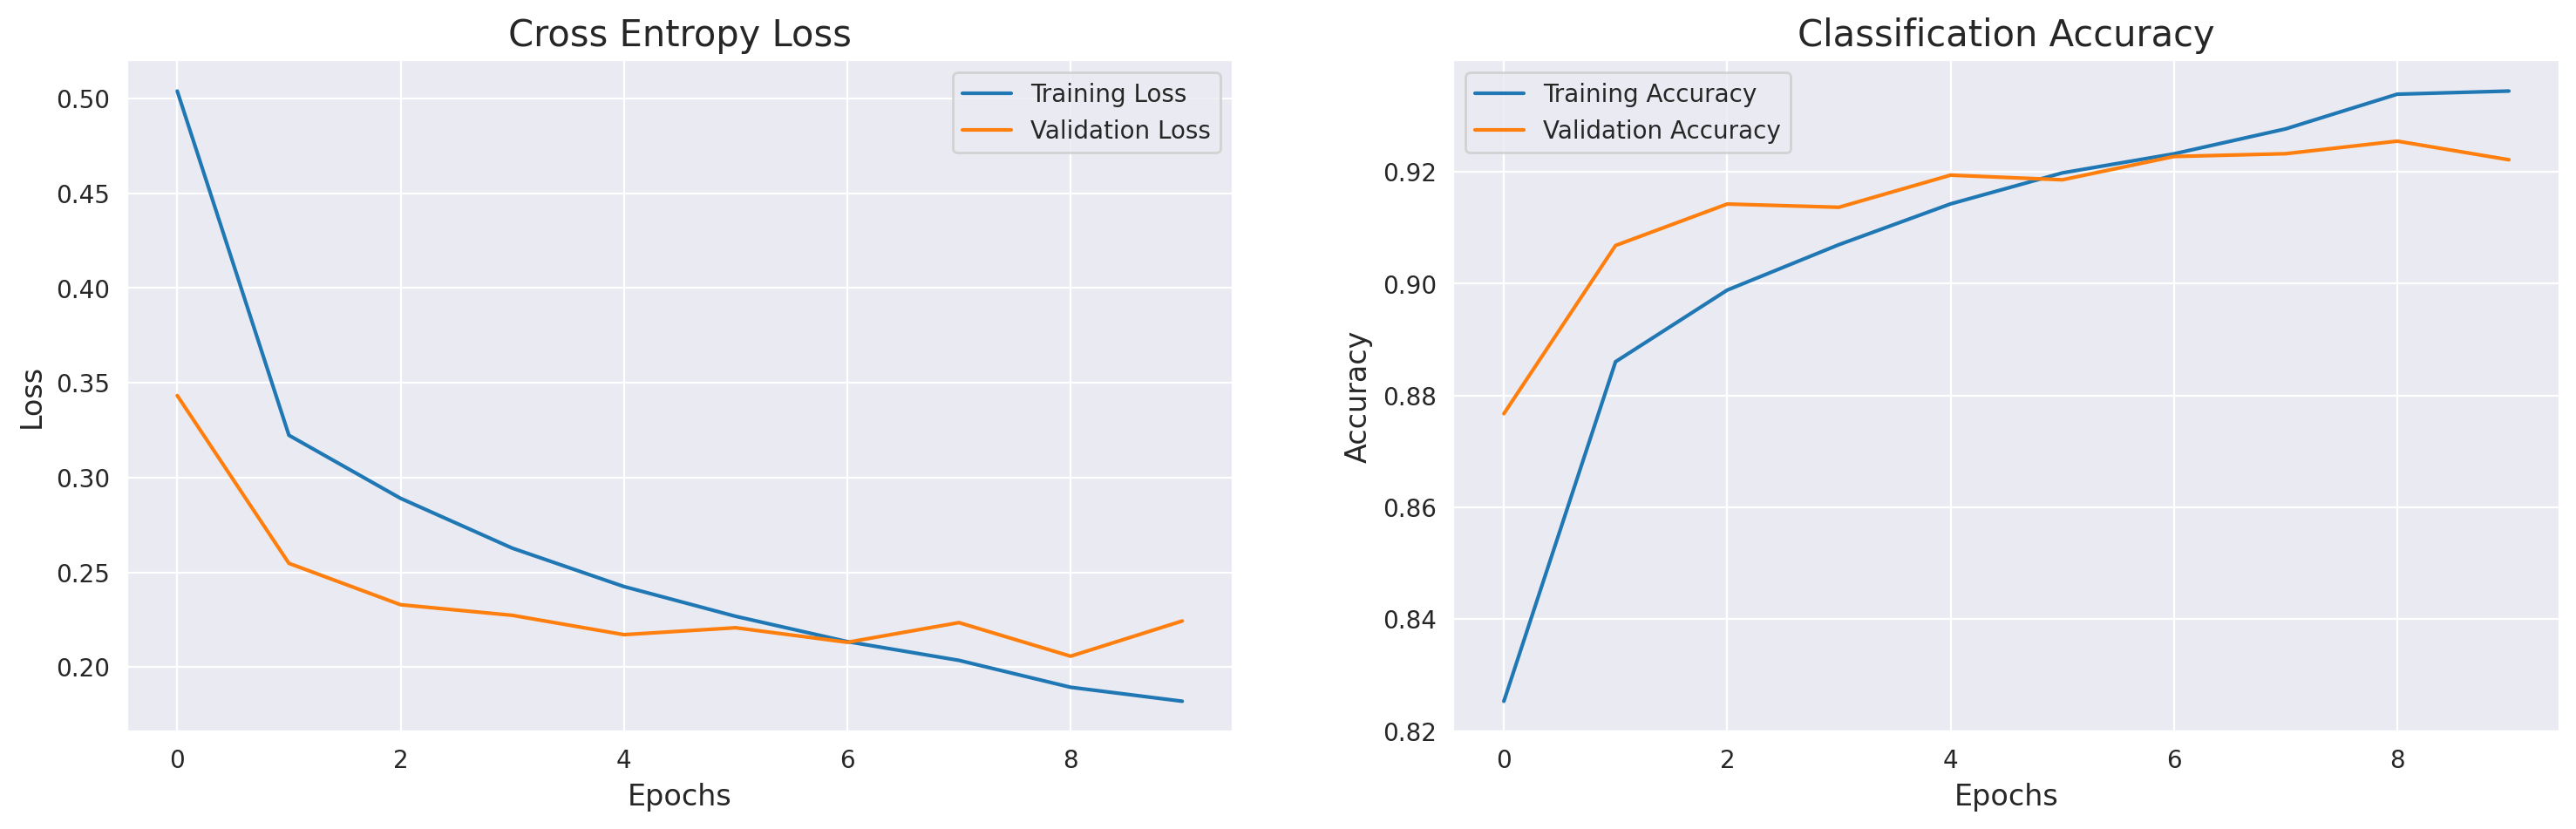

In [17]:
# Save the history for plotting
fashion = history
# Extracting training and validation metrics from the history
training_loss = fashion.history['loss']
validation_loss = fashion.history['val_loss']
training_accuracy = fashion.history['accuracy']
validation_accuracy = fashion.history['val_accuracy']

# Plotting the training and validation metrics
plt.figure(figsize=(18, 5), dpi=200)
sns.set_style('darkgrid')

# Plotting Loss
plt.subplot(121)
plt.title('Cross Entropy Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(122)
plt.title('Classification Accuracy', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.legend()

plt.show()


### Alternative Model

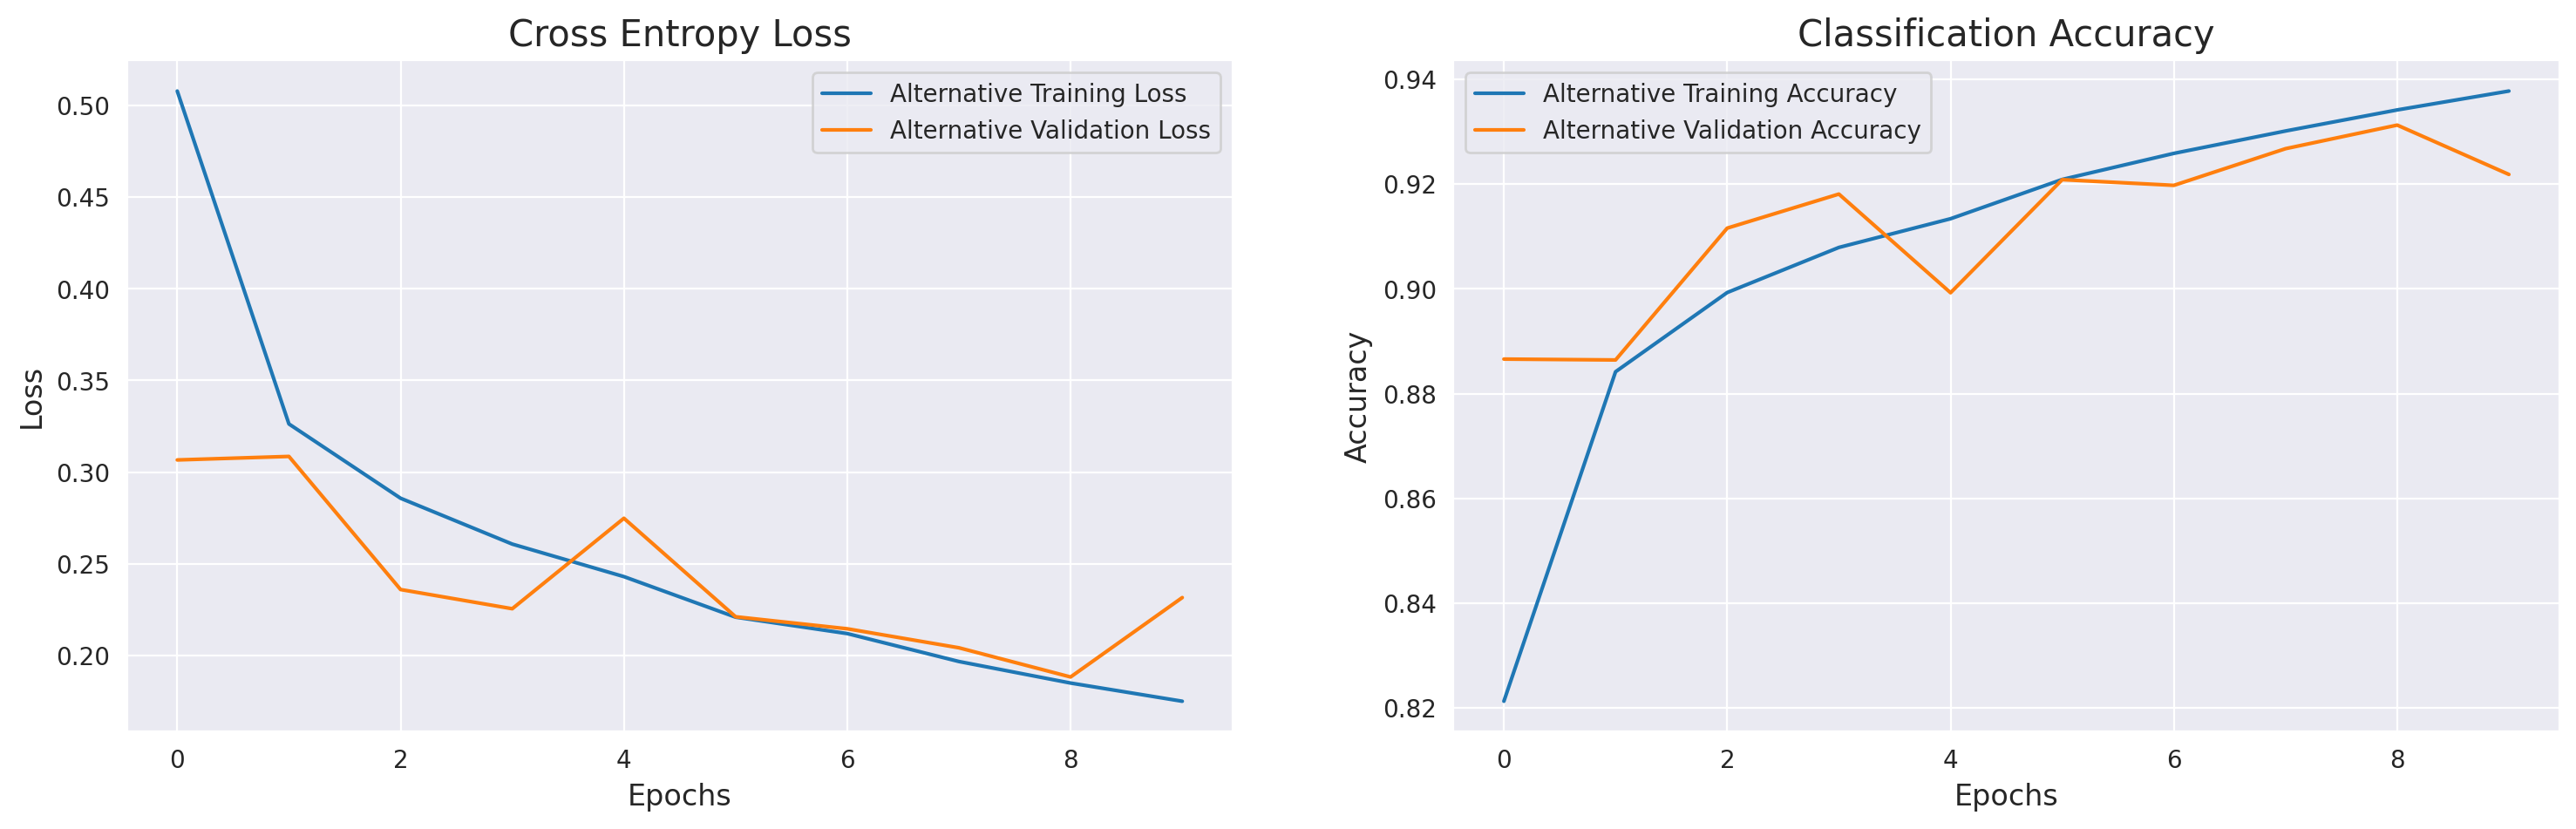

The accuracy of the Alternative Model is: 92.1833336353302
The Loss of the Alternative Model is: 0.23153047263622284


In [19]:
# Alternative Model
alternative_model = models.Sequential()

# Block 1
alternative_model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
alternative_model.add(layers.BatchNormalization())
alternative_model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
alternative_model.add(layers.BatchNormalization())
alternative_model.add(layers.MaxPooling2D())
alternative_model.add(layers.Dropout(0.2))

# Block 2
alternative_model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
alternative_model.add(layers.BatchNormalization())
alternative_model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
alternative_model.add(layers.BatchNormalization())
alternative_model.add(layers.MaxPooling2D())
alternative_model.add(layers.Dropout(0.3))

# Block 3
alternative_model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
alternative_model.add(layers.BatchNormalization())
alternative_model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
alternative_model.add(layers.BatchNormalization())
alternative_model.add(layers.Dropout(0.4))

# Output Layers
alternative_model.add(layers.Flatten())
alternative_model.add(layers.Dense(128, activation='relu'))
alternative_model.add(layers.BatchNormalization())
alternative_model.add(layers.Dropout(0.5))
alternative_model.add(layers.Dense(10, activation='softmax'))

# Compile the Alternative Model
alternative_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Model Training for the Alternative Model
alternative_history = alternative_model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    callbacks=[early_stopping],
    verbose=0
)

# Model Evaluation for the Alternative Model
alternative_loss, alternative_accuracy = alternative_model.evaluate(X_test, y_test, batch_size=64, verbose=0)

# Plotting Performance Metrics
plt.figure(figsize=(18, 5), dpi=200)
sns.set_style('darkgrid')

# Plotting Loss
plt.subplot(121)
plt.title('Cross Entropy Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.plot(alternative_history.history['loss'], label='Alternative Training Loss')
plt.plot(alternative_history.history['val_loss'], label='Alternative Validation Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(122)
plt.title('Classification Accuracy', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.plot(alternative_history.history['accuracy'], label='Alternative Training Accuracy')
plt.plot(alternative_history.history['val_accuracy'], label='Alternative Validation Accuracy')
plt.legend()

plt.show()

# Print Model Evaluation Results for the Alternative Model
print('The accuracy of the Alternative Model is:', alternative_accuracy * 100)
print('The Loss of the Alternative Model is:', alternative_loss)


**Accuracy:**

Alternative Model: 92.18%
Base Model: 92.22%
The accuracy represents the percentage of correctly classified instances. Both models have achieved high accuracy, indicating their effectiveness in making correct predictions.

**Loss:**

Alternative Model: 0.2315
Base Model: 0.2243
The loss measures the difference between the predicted values and the actual values. Both models have relatively low loss values, suggesting that they are able to make predictions with small errors.

Given the similarity in performance, the i'll proceed with the base model  

### Improving The Base Model

In [20]:
# Image Augmentation
datagen = ImageDataGenerator(
    # rotation_range=50,  # Uncomment and adjust if rotation is needed
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Create a generator for augmented training data
train_generator = datagen.flow(X_train, y_train, batch_size=64)

# Model Training with Augmented Data
history_with_augmentation = model.fit(
    train_generator,
    validation_data=(X_test, y_test),
    epochs=50,
    callbacks=[early_stopping]
)


2023-11-24 14:41:24.485580: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/50
750/750 [==============================] - 171s 225ms/step - loss: 0.3797 - accuracy: 0.8648 - val_loss: 0.2166 - val_accuracy: 0.9192
Epoch 2/50
750/750 [==============================] - 178s 237ms/step - loss: 0.3063 - accuracy: 0.8911 - val_loss: 0.2116 - val_accuracy: 0.9230
Epoch 3/50
750/750 [==============================] - 176s 235ms/step - loss: 0.2872 - accuracy: 0.8964 - val_loss: 0.2188 - val_accuracy: 0.9181
Epoch 4/50
750/750 [==============================] - 179s 239ms/step - loss: 0.2754 - accuracy: 0.9011 - val_loss: 0.2132 - val_accuracy: 0.9196
Epoch 5/50
750/750 [==============================] - 178s 237ms/step - loss: 0.2699 - accuracy: 0.9015 - val_loss: 0.2204 - val_accuracy: 0.9183
Epoch 6/50
750/750 [==============================] - 177s 236ms/step - loss: 0.2578 - accuracy: 0.9071 - val_loss: 0.2039 - val_accuracy: 0.9262
Epoch 7/50
750/750 [==============================] - 176s 235ms/step - loss: 0.2548 - accuracy: 0.9074 - val_loss: 0.2019 -

In [21]:
# Evaluate the Final Model
final_loss, final_accuracy = model.evaluate(X_test, y_test, batch_size=64, verbose=0)

# Print Evaluation Results
print('The accuracy of the Final Model is:', final_accuracy * 100)
print('The Loss of the Final Model is:', final_loss)


The accuracy of the Final Model is: 93.18333268165588
The Loss of the Final Model is: 0.18778224289417267


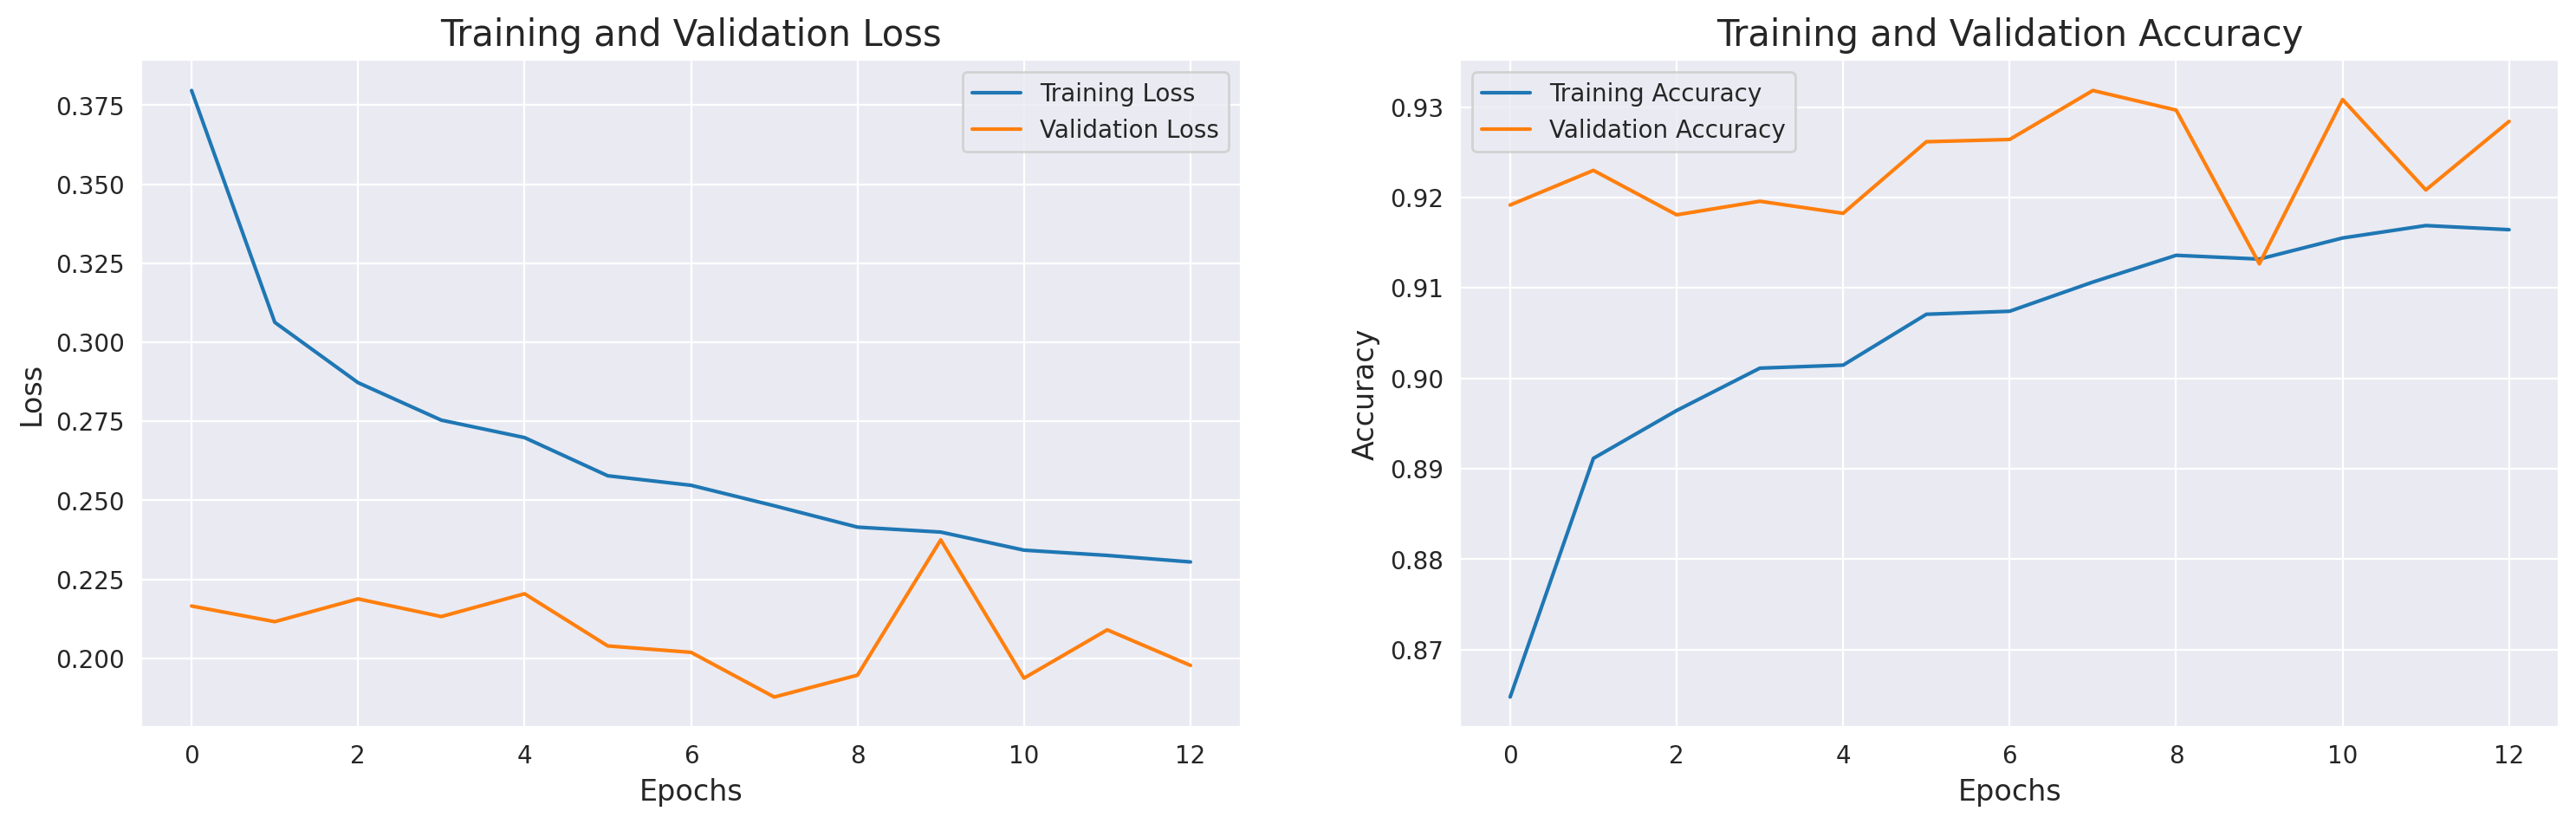

In [22]:
# Extracting training and validation metrics from the history
training_loss = history_with_augmentation.history['loss']
validation_loss = history_with_augmentation.history['val_loss']
training_accuracy = history_with_augmentation.history['accuracy']
validation_accuracy = history_with_augmentation.history['val_accuracy']

# Plotting Performance Metrics
plt.figure(figsize=(18, 5), dpi=200)
sns.set_style('darkgrid')

# Plotting Loss
plt.subplot(121)
plt.title('Training and Validation Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(122)
plt.title('Training and Validation Accuracy', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.legend()

plt.show()


### Prediction

I'll load the final model and evaluate it on the hold out  dataset.

In [23]:
y_pred = model.predict(test)
y_pred = np.argmax(y_pred,axis=1)

313/313 [==============================] - 11s 33ms/step


first, I will print the classification report.

In [31]:

labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(classification_report(test_label, y_pred, target_names=labels))


              precision    recall  f1-score   support

 T-shirt/top       0.86      0.90      0.88      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.88      0.91      0.89      1000
       Dress       0.94      0.91      0.92      1000
        Coat       0.89      0.88      0.88      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.79      0.76      0.77      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.92     10000
weighted avg       0.93      0.93      0.92     10000



Next i'll visualize the confusion matrix 

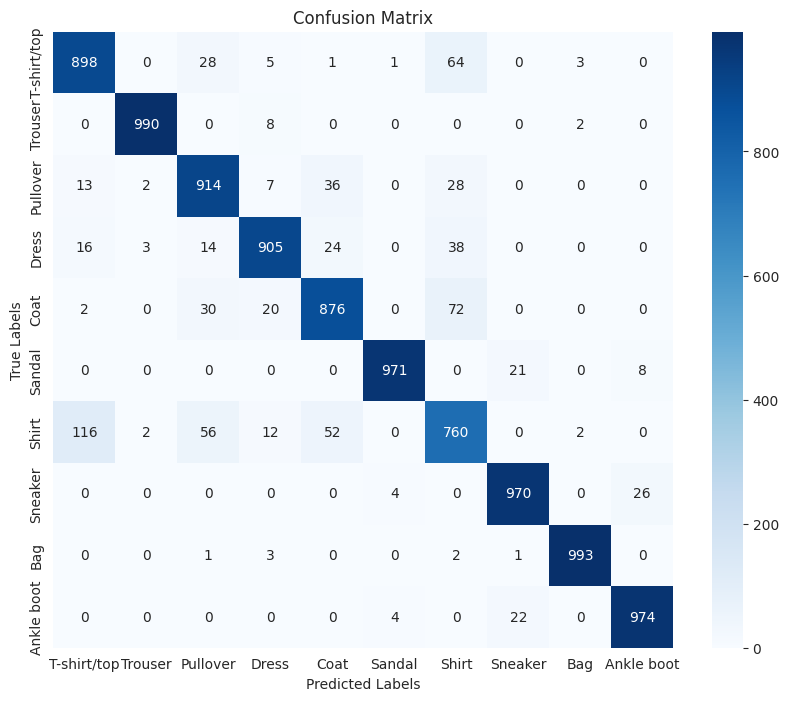

In [32]:
# Calculate confusion matrix
conf_mat = confusion_matrix(test_label, y_pred)

# Get class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Visualizing Classified Image

In [33]:
# Select the first 10,000 samples for analysis
p = y_pred[:10000]
y = test_label[:10000]

# Identify correct and incorrect predictions
correct_indices = np.nonzero(p == y)[0]
incorrect_indices = np.nonzero(p != y)[0]

# Print the number of correct and incorrect predictions
print("Correctly predicted classes:", len(correct_indices))
print("Incorrectly predicted classes:", len(incorrect_indices))


Correctly predicted classes: 9251
Incorrectly predicted classes: 749


### Correctly classified Images

I'll visualize some images classified correctlly

In [38]:
# function to plot images
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(20,10),dpi=200)

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(test[indx].reshape(28,28), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(labels[test_label[indx]],labels[y_pred[indx]]))
    plt.show()
    plt.tight_layout()

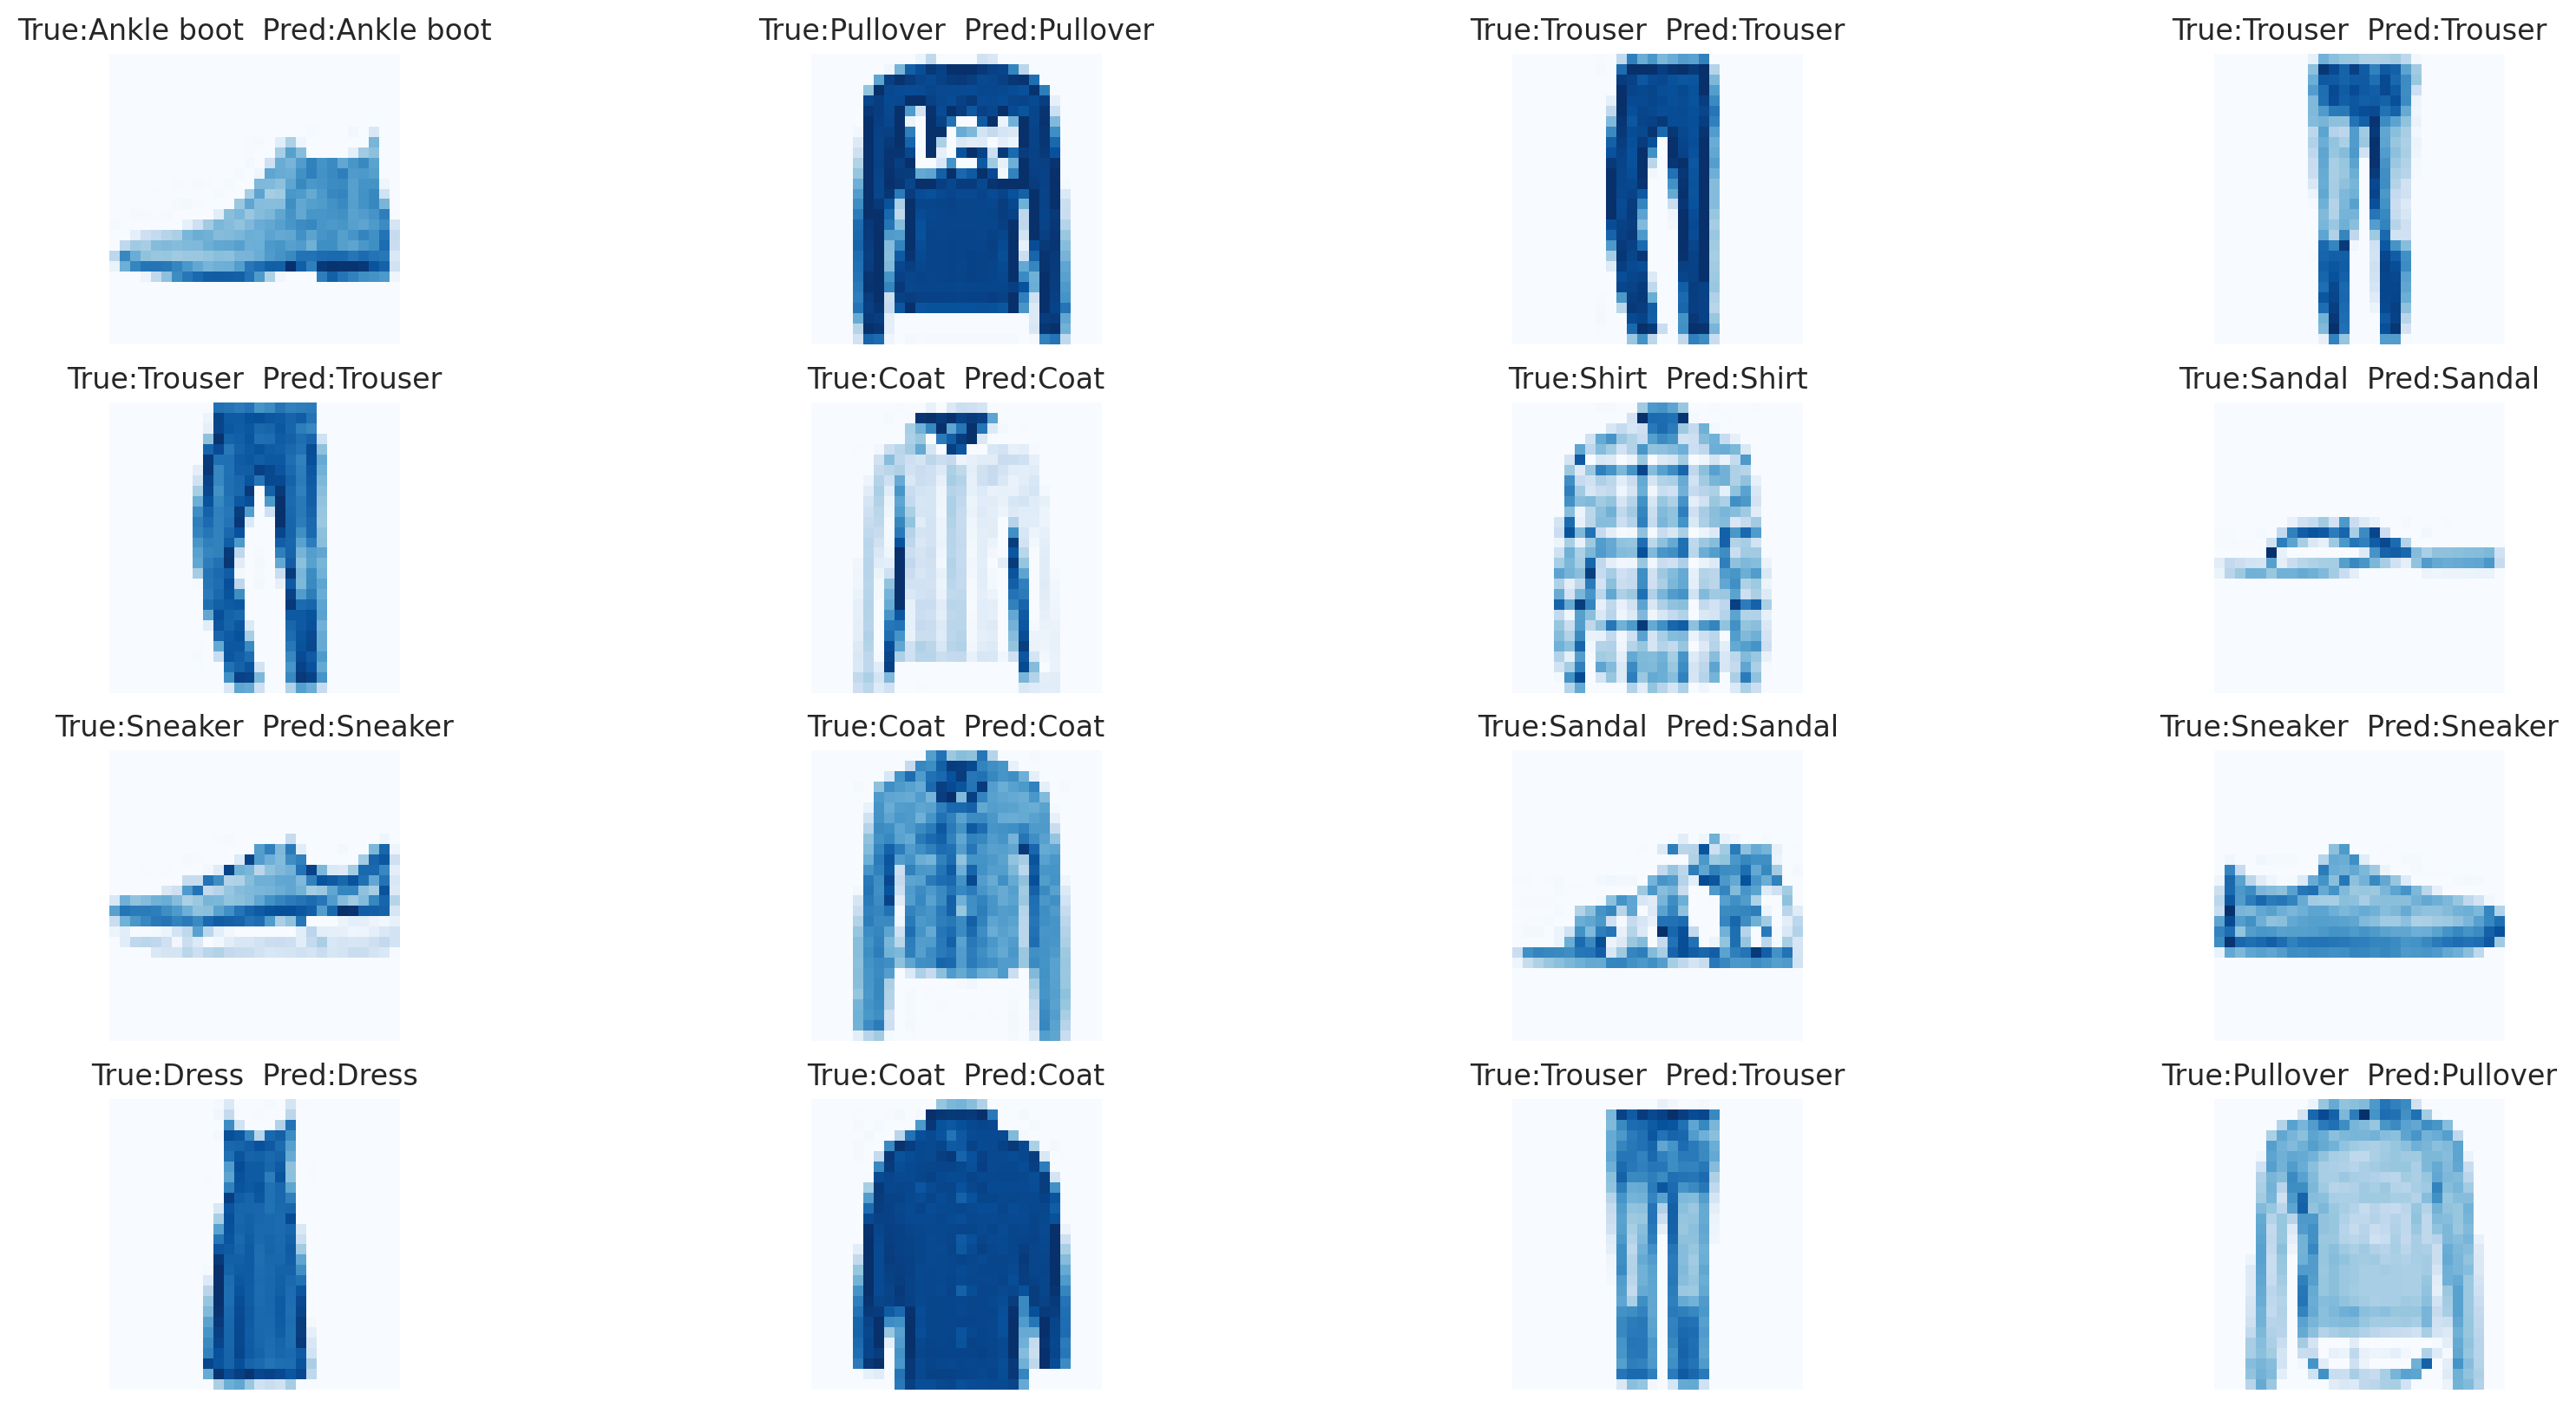

<Figure size 640x480 with 0 Axes>

In [41]:
# correct labeled images 
plot_images(correct_indices, "Blues")

### Incorrectly Classified Images

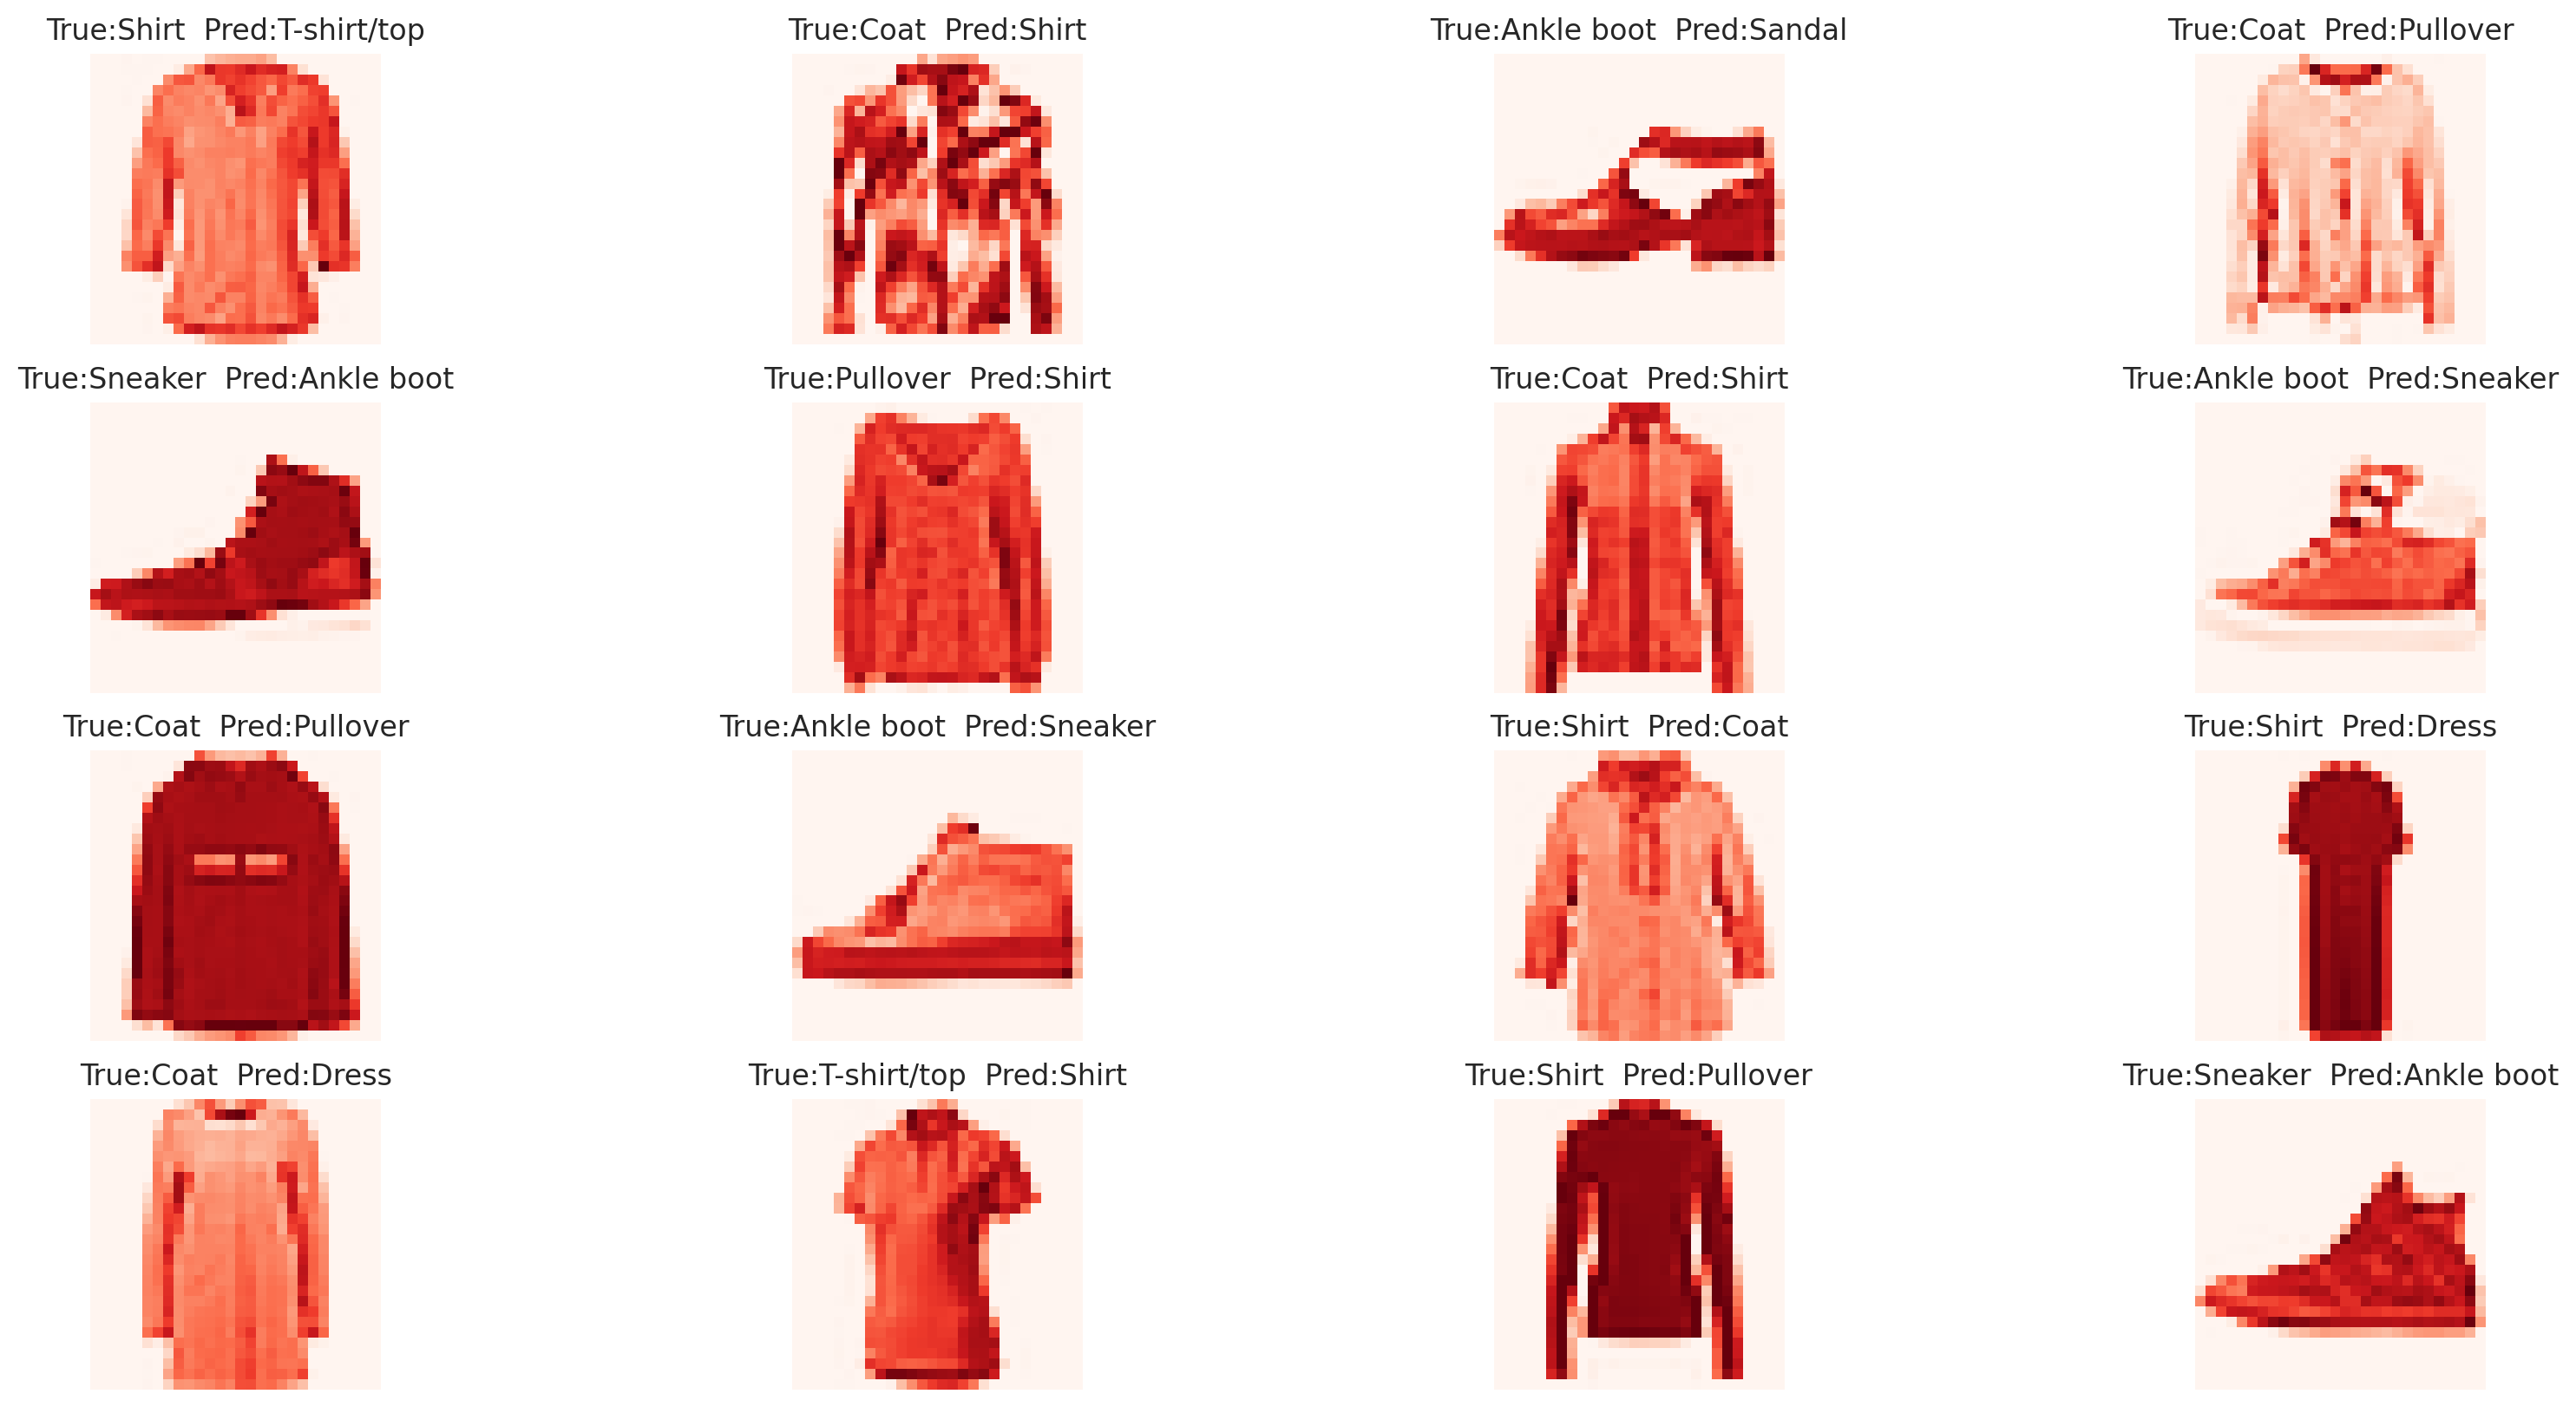

<Figure size 640x480 with 0 Axes>

In [42]:
# incorrect labeled images
plot_images(incorrect_indices, "Reds")

## CONCLUSION

Trained a CNN model with three blocks for fashion classification.
Achieved high accuracy: Base model (92.22%), Alternative model (92.18%).
Implemented data augmentation for better generalization.
Final model achieved 93% accuracy on the test set.
Classification report showed strong performance across classes.